# Overview

inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; 
otherwise, Manhattan distance in case most of the features are categorical

In [94]:
# import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


In [95]:
# Reading the data
data = pd.read_csv('clustering.csv')
data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


Gonna take only the “LoanAmount” and “ApplicantIncome" vars


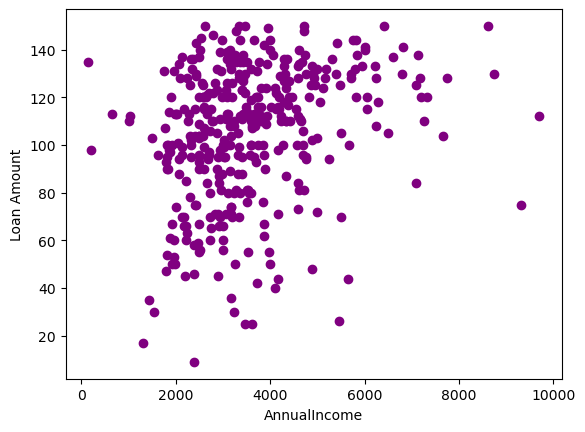

In [96]:
X = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='purple')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

### Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster


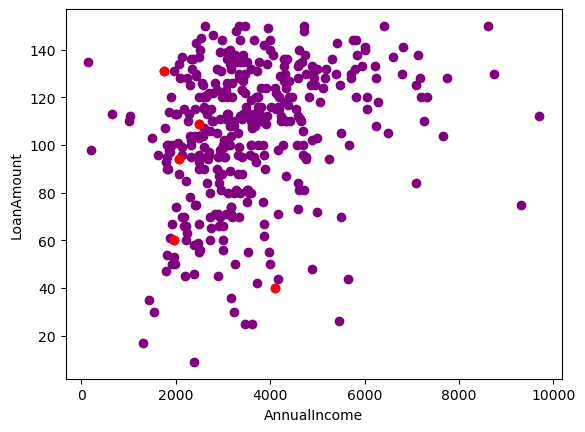

In [100]:
k = 5 # gonna choose 3 clusters

Centroids = (X.sample(n=k)) # returns specified number of random rows fro the dataframe 'X', in our case k random centroids 
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c= 'purple')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('LoanAmount')
plt.show()

### Step 3 - Assign all the points to the closest cluster centroid
### Step 4 - Recompute centroids of newly formed clusters
### Step 5 - Repeat step 3 and 4


In [101]:
print(Centroids)
X.head()

     LoanAmount  ApplicantIncome            1            2            3  \
6         109.0             2500   888.769014  4386.736777  1456.799358   
73         94.0             2071  1317.793252  4815.805751  1027.640292   
69        131.0             1759  1629.978289  5127.713900   717.083377   
379        40.0             4106   720.097026  2781.990823  3062.929116   
287        60.0             1958  1431.432345  4929.130647   914.938889   

               4            5  Cluster  
6     173.629232  2206.890545        4  
73    255.760427  2635.948341        4  
69    568.701845  2947.952043        4  
379  1780.206550   605.151946        5  
287   370.664947  2749.375092        4  


,LoanAmount,ApplicantIncome,1,2,3,4,5,Cluster
0,128.0,4583,1194.485484,2303.712460,3539.862394,2256.469913,124.956097,5
1,66.0,3000,390.610545,3887.148690,1956.691281,674.018601,1707.500661,1
2,120.0,2583,805.913404,4303.711946,1540.000055,257.227324,2123.905092,4
3,141.0,6000,2611.506635,886.864685,4956.917467,3673.521836,1293.442932,2
4,95.0,2333,1055.793695,4553.804709,1289.639550,6.866298,2373.947655,4


In [ ]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0): #if the diff==0 that means that clusters changement is stable, so we stop theres 
    XD=X.copy() #i used this instead of assiginng df to df directly cuz that causes problems like settingwithcopywarning
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we gonna calculate the distance between every centroid in row_c(Centroids) and the point tuples coming from row_d (Dataframe)
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    NewCentroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (NewCentroid['LoanAmount'] - Centroids['LoanAmount']).sum() + (NewCentroid['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

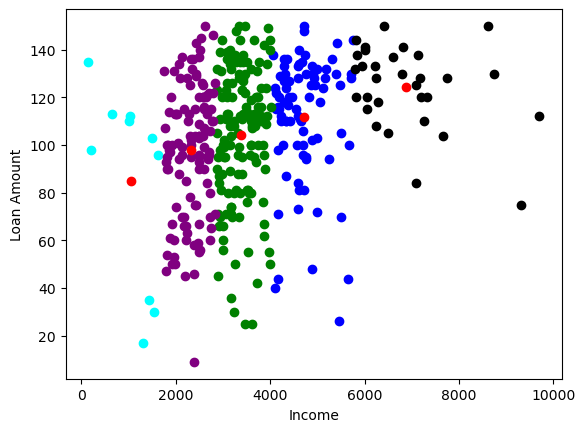

In [103]:
color=['blue','green','cyan', 'black', 'purple']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  

Kmeans optimized approach by not initializing K
1. The first centroid is selected randomly.

2. Calculate the Euclidean distance between the centroid and every other data point in the dataset. The point farthest away will become our next centroid.

3. Create clusters around these centroids by associating every point with its nearest centroid.

4. The point which has the farthest distance from its centroid will be our next centroid.

5. Repeat steps 3 and 4 until n number of centroids are located.

In [104]:

def get_kmeans_pp_centroids(X1, k=5):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["ApplicantIncome"] - row["ApplicantIncome"])**2 +(X1["LoanAmount"] - row["LoanAmount"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["ApplicantIncome", "LoanAmount"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids

In [105]:
centroids = get_kmeans_pp_centroids(X, k=5)


     LoanAmount  ApplicantIncome           1           2            3  \
292       118.0             4301  405.937721  912.351902  3257.768158   

               4            5  Cluster  
292  2585.717646  1974.371157        1  


In [106]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0): #if the diff==0 that means that clusters changement is stable, so we stop theres 
    XD=X.copy() #i used this instead of assiginng df to df directly cuz that causes problems like settingwithcopywarning
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we gonna calculate the distance between every centroid in row_c(Centroids) and the point tuples coming from row_d (Dataframe)
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    NewCentroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (NewCentroid['LoanAmount'] - Centroids['LoanAmount']).sum() + (NewCentroid['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

162.24888395140988
133.82125743889264
130.11080908335305
91.45311640151778
75.4773723225211
55.54372709687914
21.701898327384868
0.0


In [107]:
print(k)

4


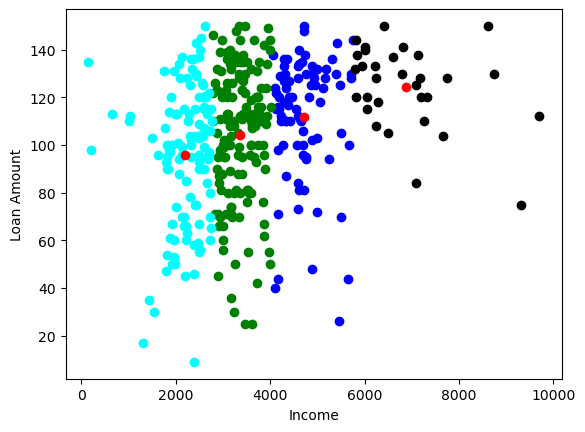

In [108]:
color=['blue','green','cyan', 'black', 'purple']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  

In [109]:
def kmeans_clustering(X, k=5, epsilon=1e-4, max_iters=100):
    # initialize centroids using k-means++
    centroids = get_kmeans_pp_centroids(X, k)
    
    # initialize cluster assignments and local densities
    C = np.zeros(len(X), dtype=int)
    rho = np.zeros(len(X))
    
    # calculate local densities for each data point
    dists = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        dists[i] = np.linalg.norm(X.values - X.iloc[i].values, axis=1)
        dists[i, i] = np.inf
    nearest = np.argsort(dists, axis=1)
    for i in range(len(X)):
        rho[i] = 1 / (np.mean(dists[i, nearest[i, 1:k+1]]) / k)
    
    # assign each data point to the closest centroid
    for i in range(len(X)):
        dists = np.linalg.norm(X.iloc[i].values - centroids.values, axis=1)
        C[i] = np.argmin(dists)
    
    # repeat until convergence or max iterations reached
    converged = False
    iters = 0
    while not converged and iters < max_iters:
        # calculate local densities and average distances for each cluster
        avg_dists = np.zeros(k)
        cluster_sizes = np.zeros(k)
        for i in range(k):
            idxs = np.where(C == i)[0]
            if len(idxs) > 0:
                dists = np.linalg.norm(X.iloc[idxs].values - centroids.iloc[i].values, axis=1)
                avg_dists[i] = np.mean(dists)
                cluster_sizes[i] = len(idxs)
                rho[idxs] = 1 / (avg_dists[i] * k)
                
        # update centroids based on cluster means
        new_centroids = centroids.copy()
        for i in range(k):
            idxs = np.where(C == i)[0]
            if len(idxs) > 0:
                new_centroids.iloc[i] = np.mean(X.iloc[idxs], axis=0)
        
        # check for convergence
        if np.max(np.abs(new_centroids.values - centroids.values)) < epsilon:
            converged = True
            
        # update cluster assignments
        for i in range(len(X)):
            dists = np.linalg.norm(X.iloc[i].values - new_centroids.values, axis=1)
            C[i] = np.argmin(dists)
            
        # update centroids
        centroids = new_centroids.copy()
        
        iters += 1
            
    k = len(centroids)

    # calculate local densities for each data point
    dists = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        dists[i] = np.linalg.norm(X.values - X.iloc[i].values, axis=1)
        dists[i, i] = np.inf
    nearest = np.argsort(dists, axis=1)
    rho = np.zeros(len(X))
    for i in range(len(X)):
        rho[i] = 1 / (np.mean(dists[i, nearest[i, 1:k+1]]) / k)

    # calculate density threshold
    rho_mean = np.mean(rho)
    rho_std = np.std(rho)
    rho_threshold = rho_mean - rho_std

    # create a list of colors for the clusters
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'][:k]

    # plot data points
    for i in range(k):
        idxs = np.where(C == i)[0]
        if len(idxs) > 0:
            plt.scatter(X.iloc[idxs]["ApplicantIncome"], X.iloc[idxs]["LoanAmount"], s=50, c=colors[i], alpha=0.5, label="Cluster " + str(i + 1))

    # plot centroids
    plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], marker="x", s=200, linewidths=3, color="black")

    # add labels and legend
    plt.xlabel("ApplicantIncome")
    plt.ylabel("LoanAmount")
    plt.title("K-means Clustering")

    # remove noise points
    noise_idxs = np.where(rho < rho_threshold)[0]
    plt.scatter(X.iloc[noise_idxs]["ApplicantIncome"], X.iloc[noise_idxs]["LoanAmount"], s=50, c="gray", alpha=0.5, label="Noise")

    plt.legend()
    plt.show()

     LoanAmount  ApplicantIncome          1            2            3  \
245       125.0             5488  781.22427  2118.468696  3291.623779   

               4            5  Cluster  
245  1398.709798  3161.384841        1  


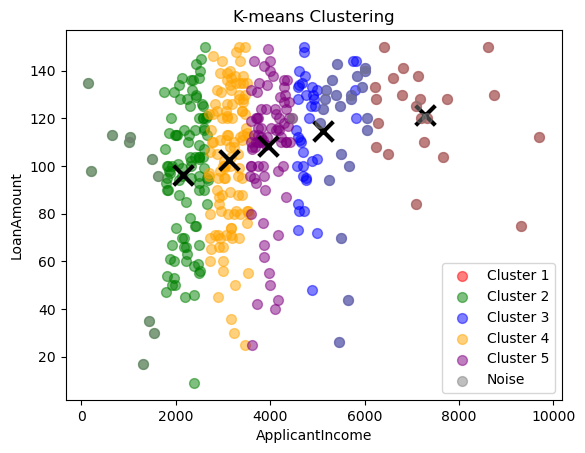

In [114]:
kmeans_clustering(X,5)